I will try to find a possible customer segmentation enabling to classify customers according the different purchases style.

In [4]:
import numpy as np 
import pandas as pd 

In [7]:
order_products_train_df = pd.read_csv("data/order_products__train.csv")
order_products_prior_df = pd.read_csv("data/order_products__prior.csv")
orders_df =pd.read_csv("data/orders.csv")
products_df =pd.read_csv("data/products.csv")
aisles_df = pd.read_csv("data/aisles.csv")
departments_df = pd.read_csv("data/departments.csv")

In [8]:
order_prior = pd.merge(order_products_prior_df, orders_df, on =['order_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [11]:
order_products = pd.merge(order_products_prior_df,products_df, on= "product_id")
order_products = pd.merge(order_products,orders_df,on ='order_id')
order_products = pd.merge(order_products,aisles_df,on='aisle_id')
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs


## Clustering customers

In [14]:
order_products['aisle'].nunique()

134

We are dealing with 134 types of product (aisle).

In [15]:
order_products['aisle'].value_counts()[0:10]

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: aisle, dtype: int64

Fresh fruits and fresh vegetbales are the best sellers.

In [17]:
cust_prod = pd.crosstab(order_products['user_id'],order_products['aisle'])
cust_prod.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [18]:
cust_prod.shape

(206209, 134)

We can then execute a Principal Component Analysis to the obtained dataframe. This will reduce the number of features from the number of aisles to 6, the numbr of principal components I have chosen.

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [20]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5
0,-24.215659,2.429427,-2.466369,-0.145682,0.268996,-1.432836
1,6.463208,36.751116,8.382554,15.097541,-6.920975,-0.978040
2,-7.990302,2.404383,-11.030064,0.672243,-0.442355,-2.822788
3,-27.991129,-0.755823,-1.921732,2.091892,-0.288245,0.926315
4,-19.896394,-2.637225,0.533229,3.679230,0.612836,-1.623931


I haven plotted several pair of components looking for the one suitable, in my opinion, for a KMeans Clustering. I have chosen the (PC4,PC1) pair. Since each component is the projection of all the points of the original dataset I think each component is representative of the dataset.

In [21]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

(206209, 2)
          4          1
0  0.268996   2.429427
1 -6.920975  36.751116
2 -0.442355   2.404383
3 -0.288245  -0.755823
4  0.612836  -2.637225


C:\Users\Jean Wang\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


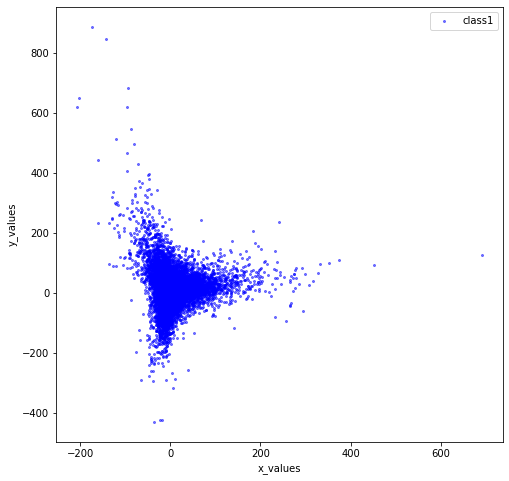

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.11868798   0.09644088]
 [-11.26760063  65.248165  ]
 [ -4.7138899  -40.63421033]
 [ 76.82338527  26.26358548]]


['orange', 'blue', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


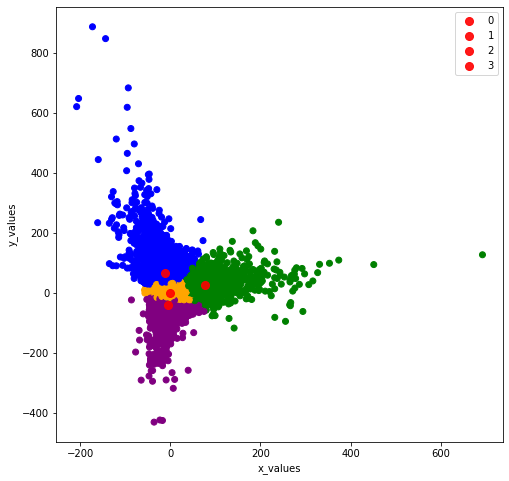

In [25]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

We have found a possible clustering for our customers. Let's check if we also manage to find some interesting pattern beneath it.

In [26]:
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,5,0
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,2,0,19,0


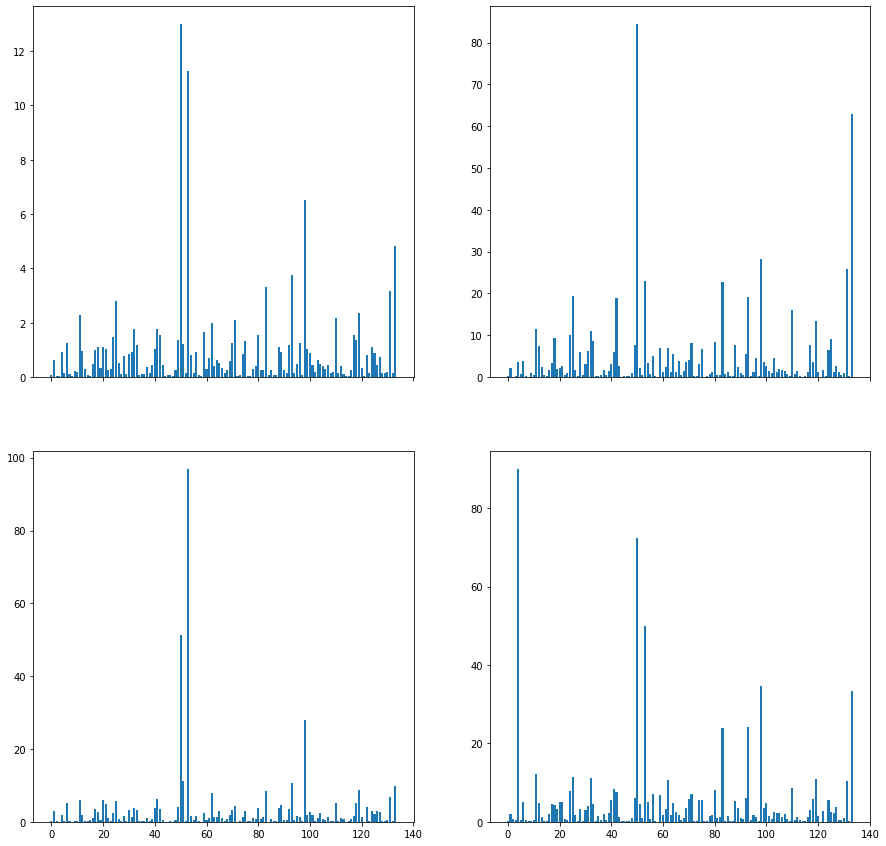

In [27]:
f,arr = plt.subplots(2,2,sharex=True,figsize=(15,15))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
plt.show()

Let's check out what are the top 10 goods bought by people of each cluster. We are going to rely first on the absolute data and then on a percentage among the top 8 products for each cluster.

In [28]:
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     12.997293
fresh vegetables                 11.264617
packaged vegetables fruits        6.532016
yogurt                            4.838682
packaged cheese                   3.754675
milk                              3.303355
water seltzer sparkling water     3.168569
chips pretzels                    2.782964
soy lactosefree                   2.349505
bread                             2.279440
dtype: float64

In [29]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     84.445473
yogurt                           62.984685
packaged vegetables fruits       28.129081
water seltzer sparkling water    25.795860
fresh vegetables                 22.891787
milk                             22.726523
chips pretzels                   19.449680
packaged cheese                  19.042915
energy granola bars              19.022383
refrigerated                     16.012959
dtype: float64

In [30]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 96.941836
fresh fruits                     51.419980
packaged vegetables fruits       27.925411
fresh herbs                      11.318104
packaged cheese                  10.646082
yogurt                            9.926398
soy lactosefree                   8.805224
milk                              8.353379
frozen produce                    7.815187
water seltzer sparkling water     6.770039
dtype: float64

In [31]:
c3.sort_values(ascending=False)[0:10]

aisle
baby food formula             90.031453
fresh fruits                  72.334056
fresh vegetables              50.059111
packaged vegetables fruits    34.557484
yogurt                        33.242950
packaged cheese               24.305315
milk                          23.996746
bread                         12.200651
chips pretzels                11.457701
crackers                      11.247831
dtype: float64

A first analysis of the clusters confirm the initial hypothesis that:

- fresh fruits
- fresh vegetables
- packaged vegetables fruits
- yogurt
- packaged cheese
- milk
- water seltzer sparkling water
- chips pretzels

are products which are genereically bought by the majority of the customers.

What we can inspect here is if clusters differ in quantities and proportions, with respect of these goods, or if a cluster is characterized by some goods not included in this list. For instance we can already see cluster 3 is characterized by 'Baby Food Formula' product which is a significant difference with respect to the other clusters.

In [32]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'],c0['packaged vegetables fruits'], c0['yogurt'], c0['packaged cheese'], c0['milk'],c0['water seltzer sparkling water'],c0['chips pretzels']],
                 [c1['fresh fruits'],c1['fresh vegetables'],c1['packaged vegetables fruits'], c1['yogurt'], c1['packaged cheese'], c1['milk'],c1['water seltzer sparkling water'],c1['chips pretzels']],
                 [c2['fresh fruits'],c2['fresh vegetables'],c2['packaged vegetables fruits'], c2['yogurt'], c2['packaged cheese'], c2['milk'],c2['water seltzer sparkling water'],c2['chips pretzels']],
                 [c3['fresh fruits'],c3['fresh vegetables'],c3['packaged vegetables fruits'], c3['yogurt'], c3['packaged cheese'], c3['milk'],c3['water seltzer sparkling water'],c3['chips pretzels']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','packaged vegetables fruits','yogurt','packaged cheese','milk','water seltzer sparkling water','chips pretzels'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,12.997293,11.264617,6.532016,4.838682,3.754675,3.303355,3.168569,2.782964
1,84.445473,22.891787,28.129081,62.984685,19.042915,22.726523,25.795860,19.449680
2,51.419980,96.941836,27.925411,9.926398,10.646082,8.353379,6.770039,5.795979
3,72.334056,50.059111,34.557484,33.242950,24.305315,23.996746,10.527657,11.457701


The following table depicts the percentage these goods with respect to the other top 8 in each cluster. It is easy some interesting differences among the clusters.

It seems people of cluster 1 buy more fresh vegetables than the other clusters. As shown by absolute data, Cluster 1 is also the cluster including those customers buying far more goods than any others.

People of cluster 2 buy more yogurt than people of the other clusters.

Absolute Data shows us People of cluster 3 buy a Lot of 'Baby Food Formula' which not even listed in the top 8 products but mainly characterize this cluster. Coherently (I think) with this observation they buy more milk than the others.

In [33]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,packaged vegetables fruits,yogurt,packaged cheese,milk,water seltzer sparkling water,chips pretzels
0,26.720216,23.158130,13.428710,9.947504,7.718970,6.791135,6.514038,5.721298
1,29.581621,8.019094,9.853741,22.063813,6.670817,7.961201,9.036403,6.813309
2,23.611072,44.513837,12.822815,4.558012,4.888477,3.835712,3.108672,2.661403
3,27.769415,19.217949,13.266795,12.762139,9.330935,9.212474,4.041622,4.398670


I think another interesting information my come by lookig at the 10th to 15th most bought products for each cluster which will not include the generic products (i.e. vegetables, fruits, water, etc.) bought by anyone.

In [34]:
c0.sort_values(ascending=False)[10:15]

aisle
refrigerated      2.168735
ice cream ice     2.082699
frozen produce    2.001447
eggs              1.778217
crackers          1.766064
dtype: float64

In [35]:
c1.sort_values(ascending=False)[10:15]

aisle
soy lactosefree    13.437227
bread              11.515146
crackers           10.998149
cereal              9.971054
candy chocolate     9.347526
dtype: float64

In [36]:
c2.sort_values(ascending=False)[10:15]

aisle
eggs                        6.176555
canned jarred vegetables    6.099542
bread                       6.015169
chips pretzels              5.795979
refrigerated                5.281124
dtype: float64

In [37]:
c3.sort_values(ascending=False)[10:15]

aisle
soy lactosefree                  11.003254
frozen produce                   10.577007
water seltzer sparkling water    10.527657
refrigerated                      8.530369
eggs                              8.318330
dtype: float64

As you can note by taking into account more products clusters start to differ significantly. I hope this informtion will be useful in the next prediction task.